## **ADULT CENSUS INCOME**

*Predict whether income exceeds $50K/yr based on census data*

DATASET : https://www.kaggle.com/datasets/uciml/adult-census-income

# Feature	Description:-

age	: Age of the individual (numeric).

workclass	: Type of employer (e.g., private, self-employed, government).
fnlwgt	Census final weight; how many people this record represents.

education	: Highest education level achieved (categorical).

education.num	: Numeric code for education level (years of schooling).

marital.status	: Marital situation (e.g., married, never married, divorced).

occupation	: Job category (e.g., sales, tech, farming).

relationship	: Family role within a household (e.g., husband, wife, not-in-family).

race	: Race of the individual (categorical).

sex	: Gender of the individual (male or female).

capital.gain	: Money gained from investments (numeric).

capital.loss	: Money lost from investments (numeric).

hours.per.week	: Number of working hours per week.

native.country	: Country of origin.

income	: Target label; whether income >50K or <=50K per year.

# Import Libraries

In [29]:
import pandas as pd
import numpy as np

#for visualizing:-
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# MODELS
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection

#from sklearn.utils import class_weight
#from sklearn.model_selection import

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# UNDERSTANDING THE DATA

In [30]:
df=pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [31]:
df.shape

(32561, 15)

In [32]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
df.describe(include=['O']).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


# VISUALIZATION

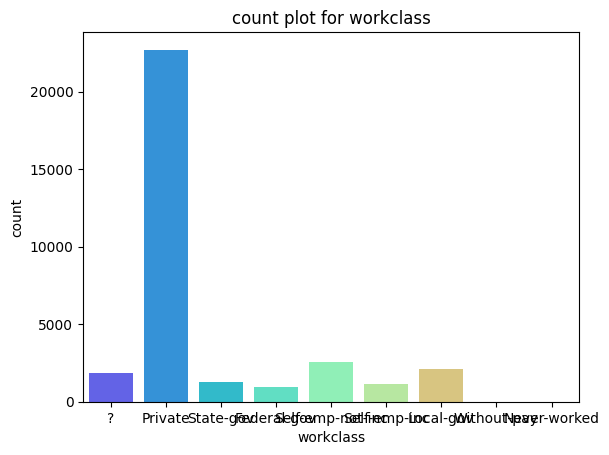

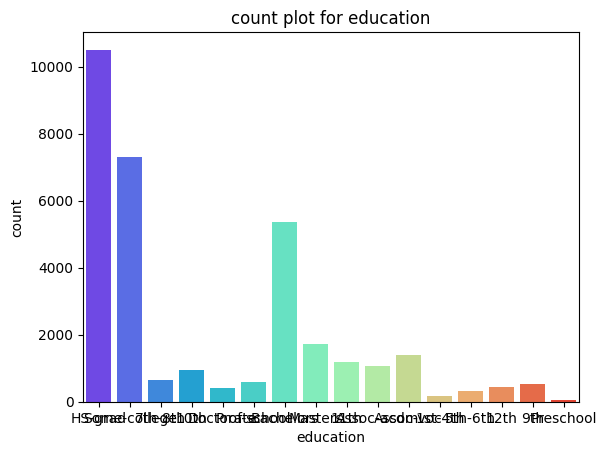

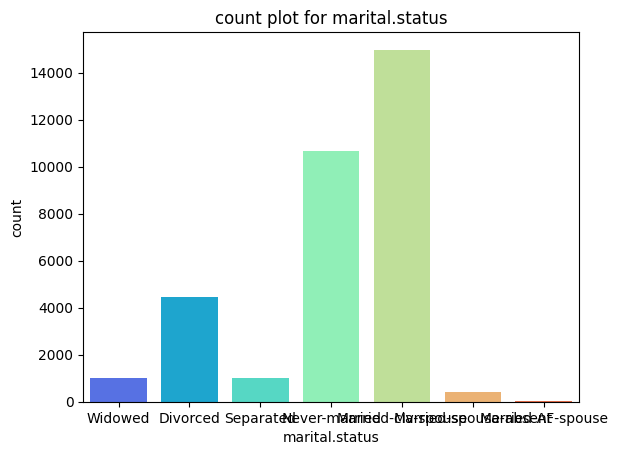

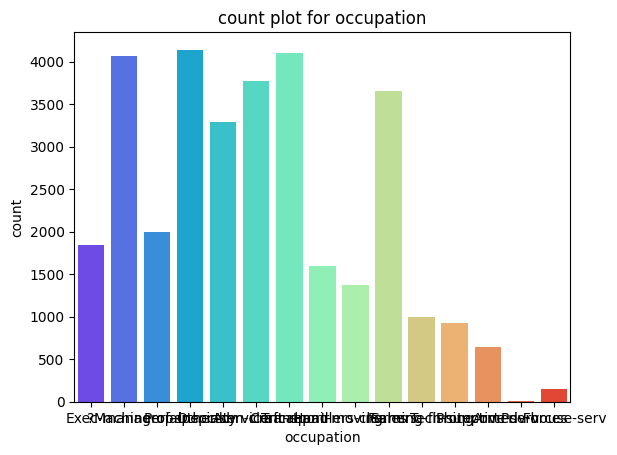

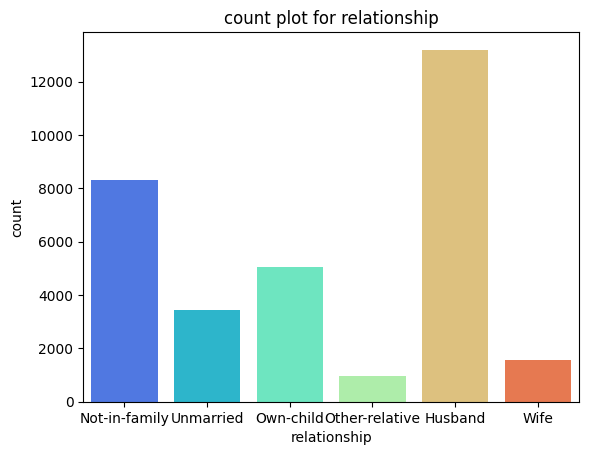

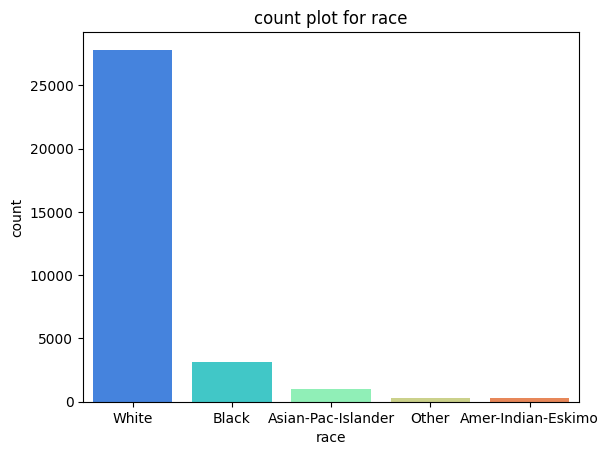

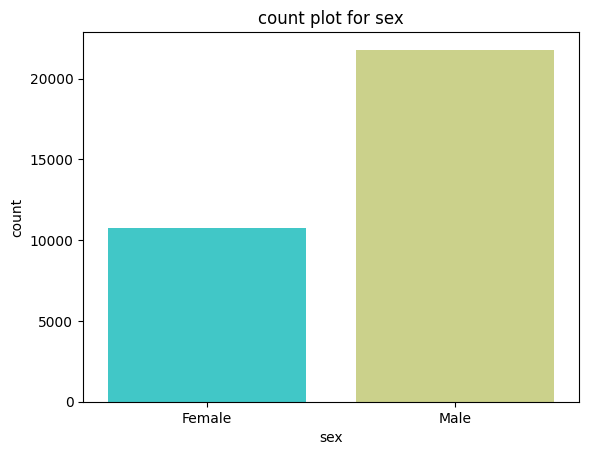

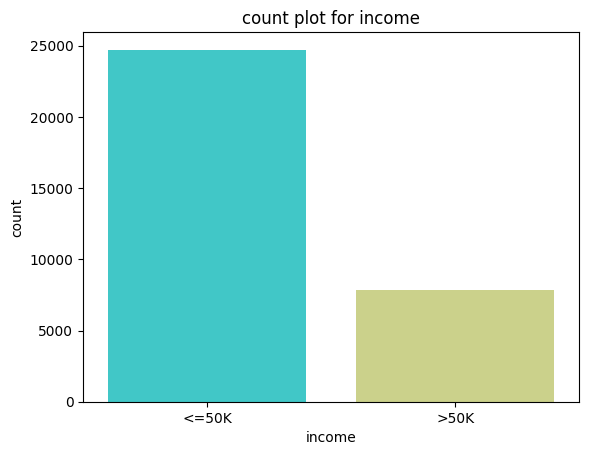

In [35]:
ctgl_clm=df.select_dtypes(include=['object','category']).columns.tolist()

for col in ctgl_clm:
    if col == 'native.country':
        continue

    plt.Figure(figsize=(6,6))
    sns.countplot(data=df,x=col,hue=col,palette='rainbow')
    plt.title(f"count plot for {col}")
    plt.show()

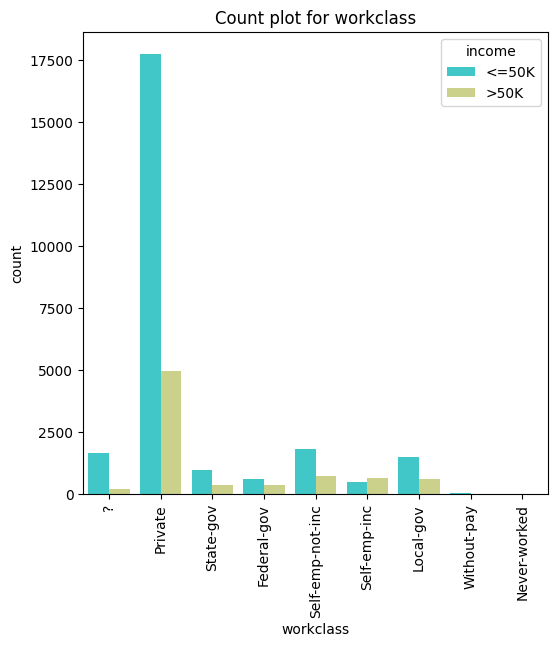

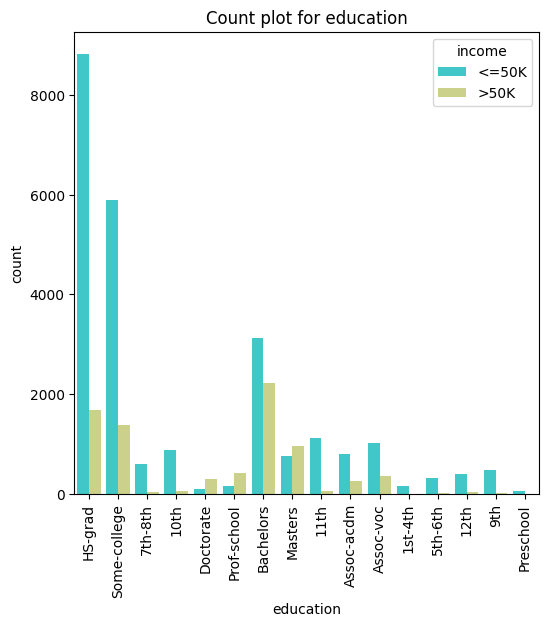

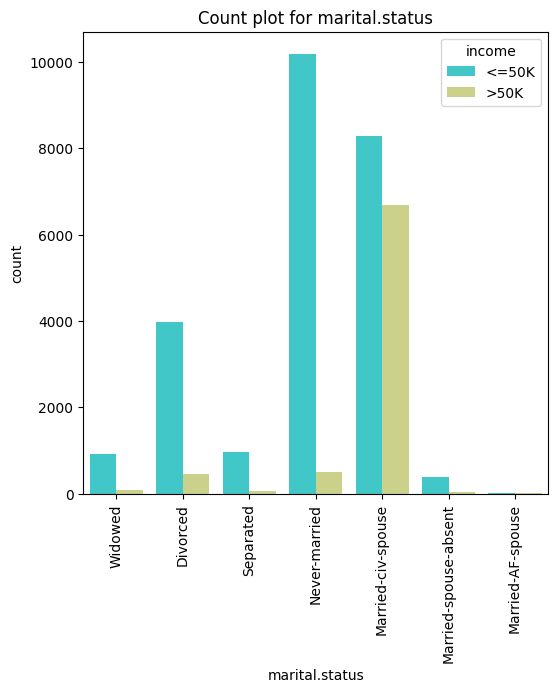

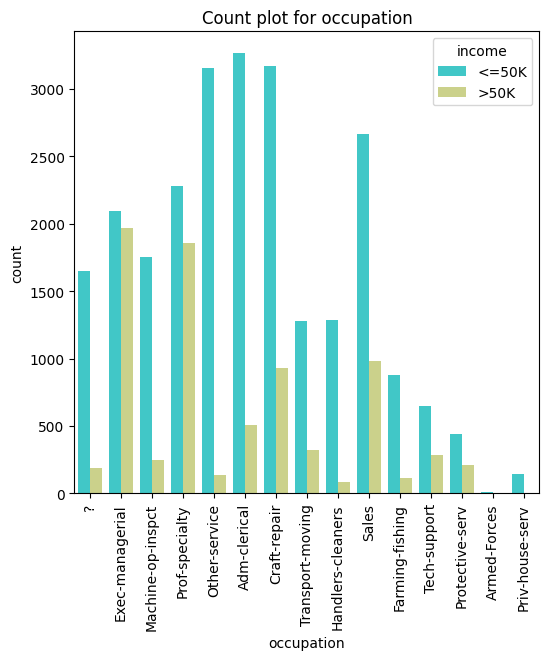

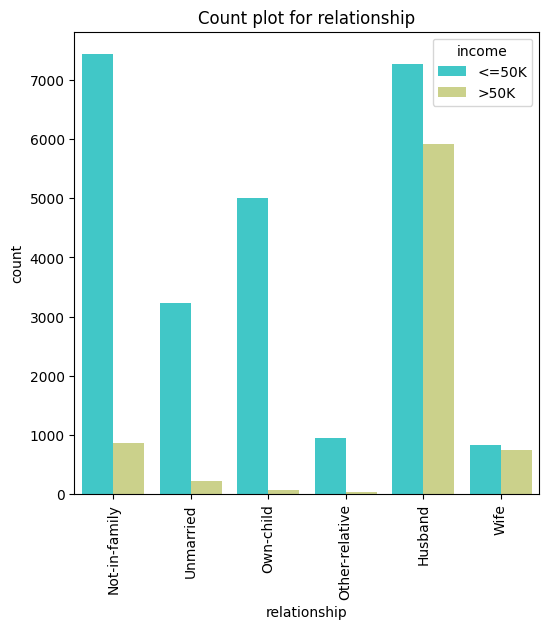

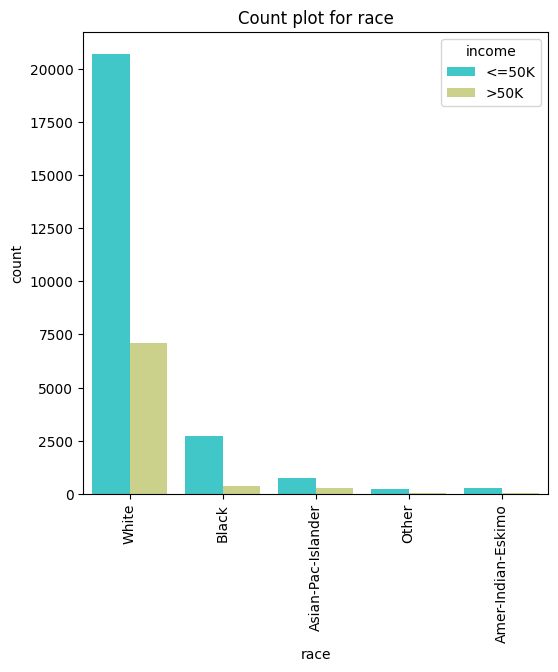

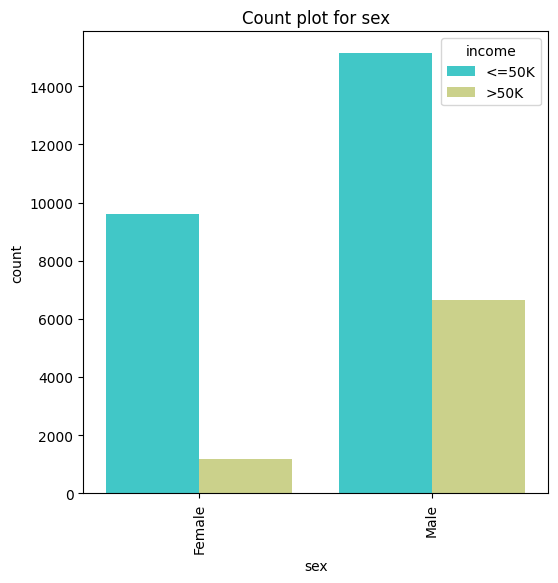

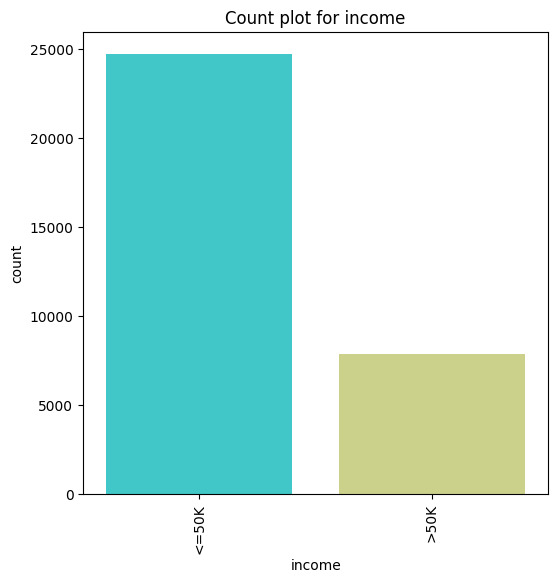

In [36]:
ctgl_clm = df.select_dtypes(include=['object','category']).columns.tolist()

for col in ctgl_clm:
    if col == 'native.country':
        continue

    plt.figure(figsize=(6,6))
    sns.countplot(data=df, x=col, hue='income', palette='rainbow')
    plt.title(f"Count plot for {col}")
    plt.xticks(rotation=90)
    plt.show()

# DATA CLEANING

In [37]:
df.duplicated().sum() #check duplicates in the dataset

np.int64(24)

In [38]:
df=df.drop_duplicates()

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.isnull().sum() #check missing values in the dataset

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### ENCODING

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [42]:
ctgrl_clm=df.select_dtypes(include=['object','category']).columns.tolist()

print("Categorical Columns :",ctgrl_clm)

Categorical Columns : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [43]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [44]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [45]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [46]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [47]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [48]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [49]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [50]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [51]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [52]:
df['income'].value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [53]:
df['income']=df['income'].map({"<=50K":0,">50K":1})

C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\662752972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income']=df['income'].map({"<=50K":0,">50K":1})


In [54]:
df['sex'].value_counts()

sex
Male      21775
Female    10762
Name: count, dtype: int64

In [55]:
df['sex']=df['sex'].map({"Female":0,"Male":1})

C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\768057042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=df['sex'].map({"Female":0,"Male":1})


In [56]:
df['race'].value_counts()

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [57]:
df['race']=df['race'].map({"Other":0,"Amer-Indian-Eskimo":1,"Asian-Pac-Islander":2,"Black":3,"White":4})

C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\4185253170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race']=df['race'].map({"Other":0,"Amer-Indian-Eskimo":1,"Asian-Pac-Islander":2,"Black":3,"White":4})


In [58]:
df['relationship'].value_counts()

relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [59]:
df['relationship']=df['relationship'].map({"Other-relative":0,"Wife":1,"Unmarried":2,"Own-child":3,"Non-in-family":4,"Husband":5})

C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\1423734898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relationship']=df['relationship'].map({"Other-relative":0,"Wife":1,"Unmarried":2,"Own-child":3,"Non-in-family":4,"Husband":5})


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  int64  
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  int64  
 3   education       32537 non-null  object 
 4   education.num   32537 non-null  int64  
 5   marital.status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    24245 non-null  float64
 8   race            32537 non-null  int64  
 9   sex             32537 non-null  int64  
 10  capital.gain    32537 non-null  int64  
 11  capital.loss    32537 non-null  int64  
 12  hours.per.week  32537 non-null  int64  
 13  native.country  32537 non-null  object 
 14  income          32537 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 4.0+ MB


In [61]:
#LABEL ENCODING

le=LabelEncoder()

for cols in df.select_dtypes('object').columns:
    df[cols]=le.fit_transform(df[cols])

C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\3207342632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols]=le.fit_transform(df[cols])
C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\3207342632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols]=le.fit_transform(df[cols])
C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\3207342632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  int64  
 1   workclass       32537 non-null  int64  
 2   fnlwgt          32537 non-null  int64  
 3   education       32537 non-null  int64  
 4   education.num   32537 non-null  int64  
 5   marital.status  32537 non-null  int64  
 6   occupation      32537 non-null  int64  
 7   relationship    24245 non-null  float64
 8   race            32537 non-null  int64  
 9   sex             32537 non-null  int64  
 10  capital.gain    32537 non-null  int64  
 11  capital.loss    32537 non-null  int64  
 12  hours.per.week  32537 non-null  int64  
 13  native.country  32537 non-null  int64  
 14  income          32537 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 4.0 MB


# DATA TRANSFORMING

### SKEWNESS HANDLING

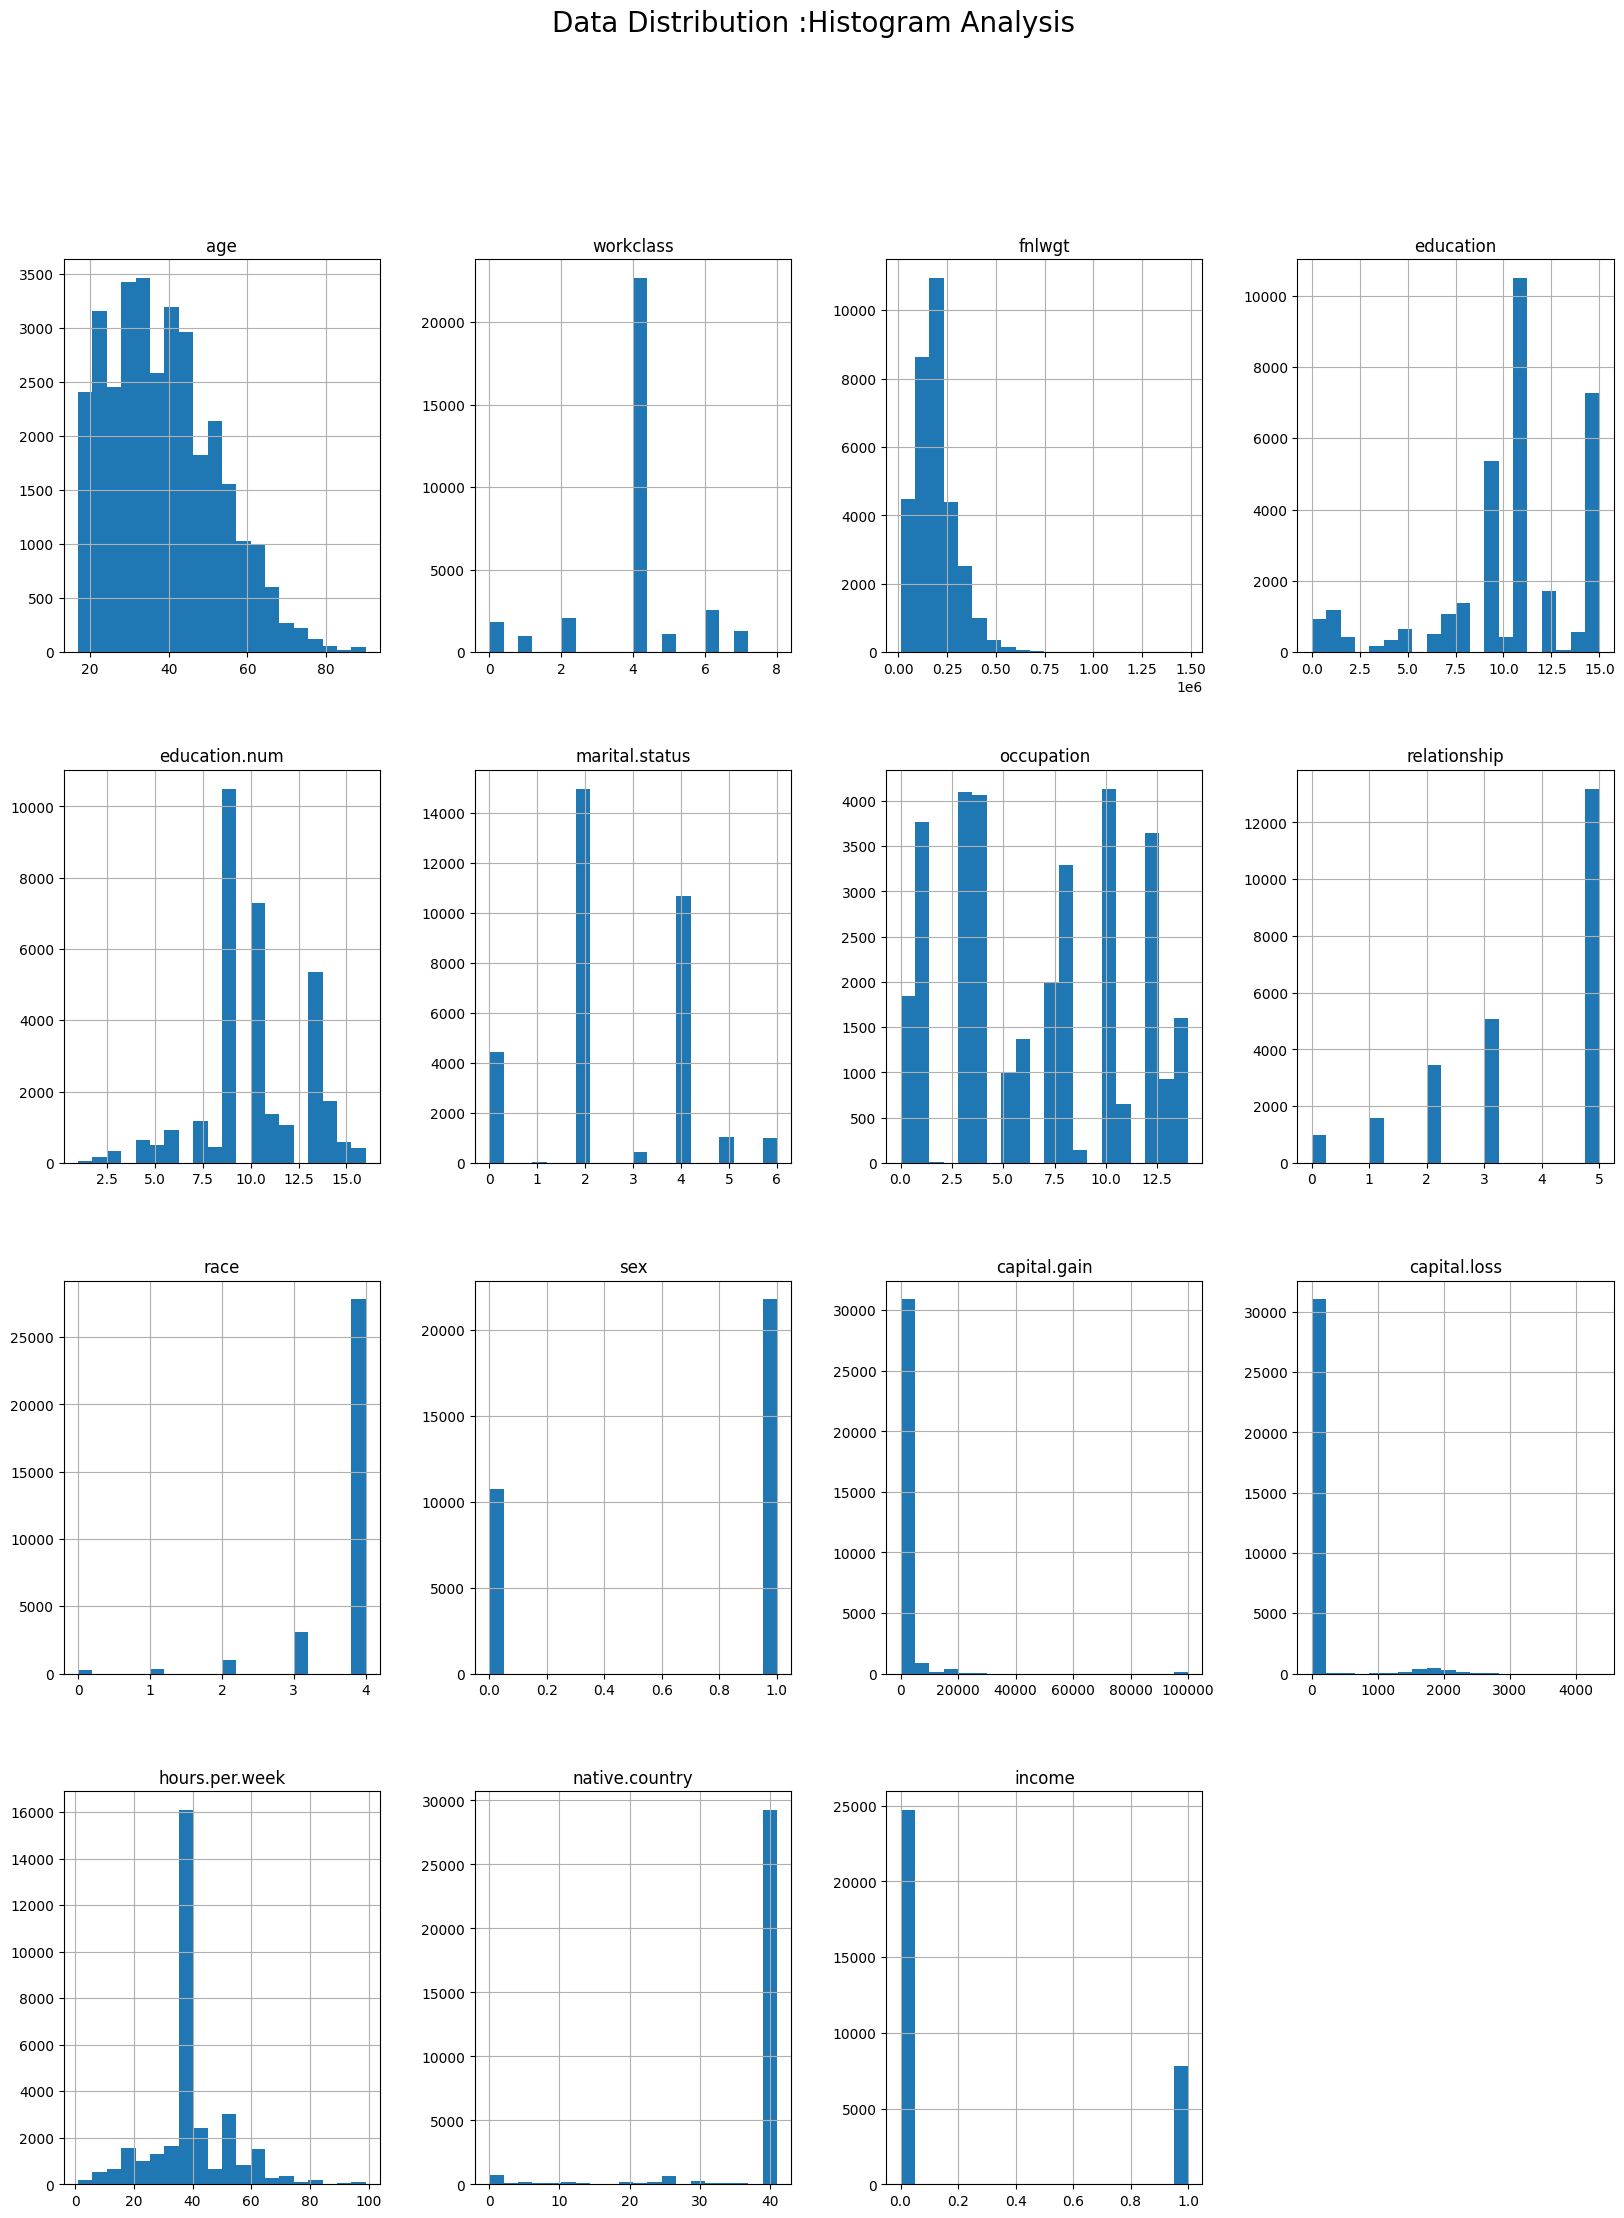

In [63]:
df.hist(bins=20, figsize=(20,25))
plt.suptitle("Data Distribution :Histogram Analysis",fontsize=20)
plt.show()

In [64]:
#calculate  skewness for each column
skewness=df.skew()

#sort the skewness values in ascending order
sort_skew=skewness.sort_values(ascending=True)

#Display the sorted skewness values 
print(sort_skew)

native.country    -3.661128
race              -3.520308
education         -0.934160
workclass         -0.751598
relationship      -0.742480
sex               -0.719449
education.num     -0.309500
marital.status    -0.012753
occupation         0.114586
hours.per.week     0.228759
age                0.557663
income             1.211687
fnlwgt             1.447703
capital.loss       4.592702
capital.gain      11.949403
dtype: float64


In [65]:
#step1 :select numeric columns excluding "income"
numeric_cols=df.drop(columns=['income']).select_dtypes(include=['number'])

#step2 :calculate skewness for numeric columns
skewness=numeric_cols.skew()

#step3 :identify columns with high skewness 
highly_skewed_cols=skewness[abs(skewness)>1].index

# step4 :Apply log transformation using np.log1p() for columns with high skew
for col in highly_skewed_cols:
    df[col]=np.log1p(df[col])     #create a new column with log transformed values 
df.head()

C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\3470904195.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=np.log1p(df[col])     #create a new column with log transformed values


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,11.252262,11,9,6,0,NaN,1.609438,0,0.0,8.379539,40,3.688879,0
1,82,4,11.797134,11,9,6,4,NaN,1.609438,0,0.0,8.379539,18,3.688879,0
2,66,0,12.133835,15,10,6,0,2.0,1.386294,0,0.0,8.379539,40,3.688879,0
3,54,4,11.851966,5,4,0,7,2.0,1.609438,0,0.0,8.268988,40,3.688879,0
4,41,4,12.486216,15,10,5,10,3.0,1.609438,0,0.0,8.268988,40,3.688879,0


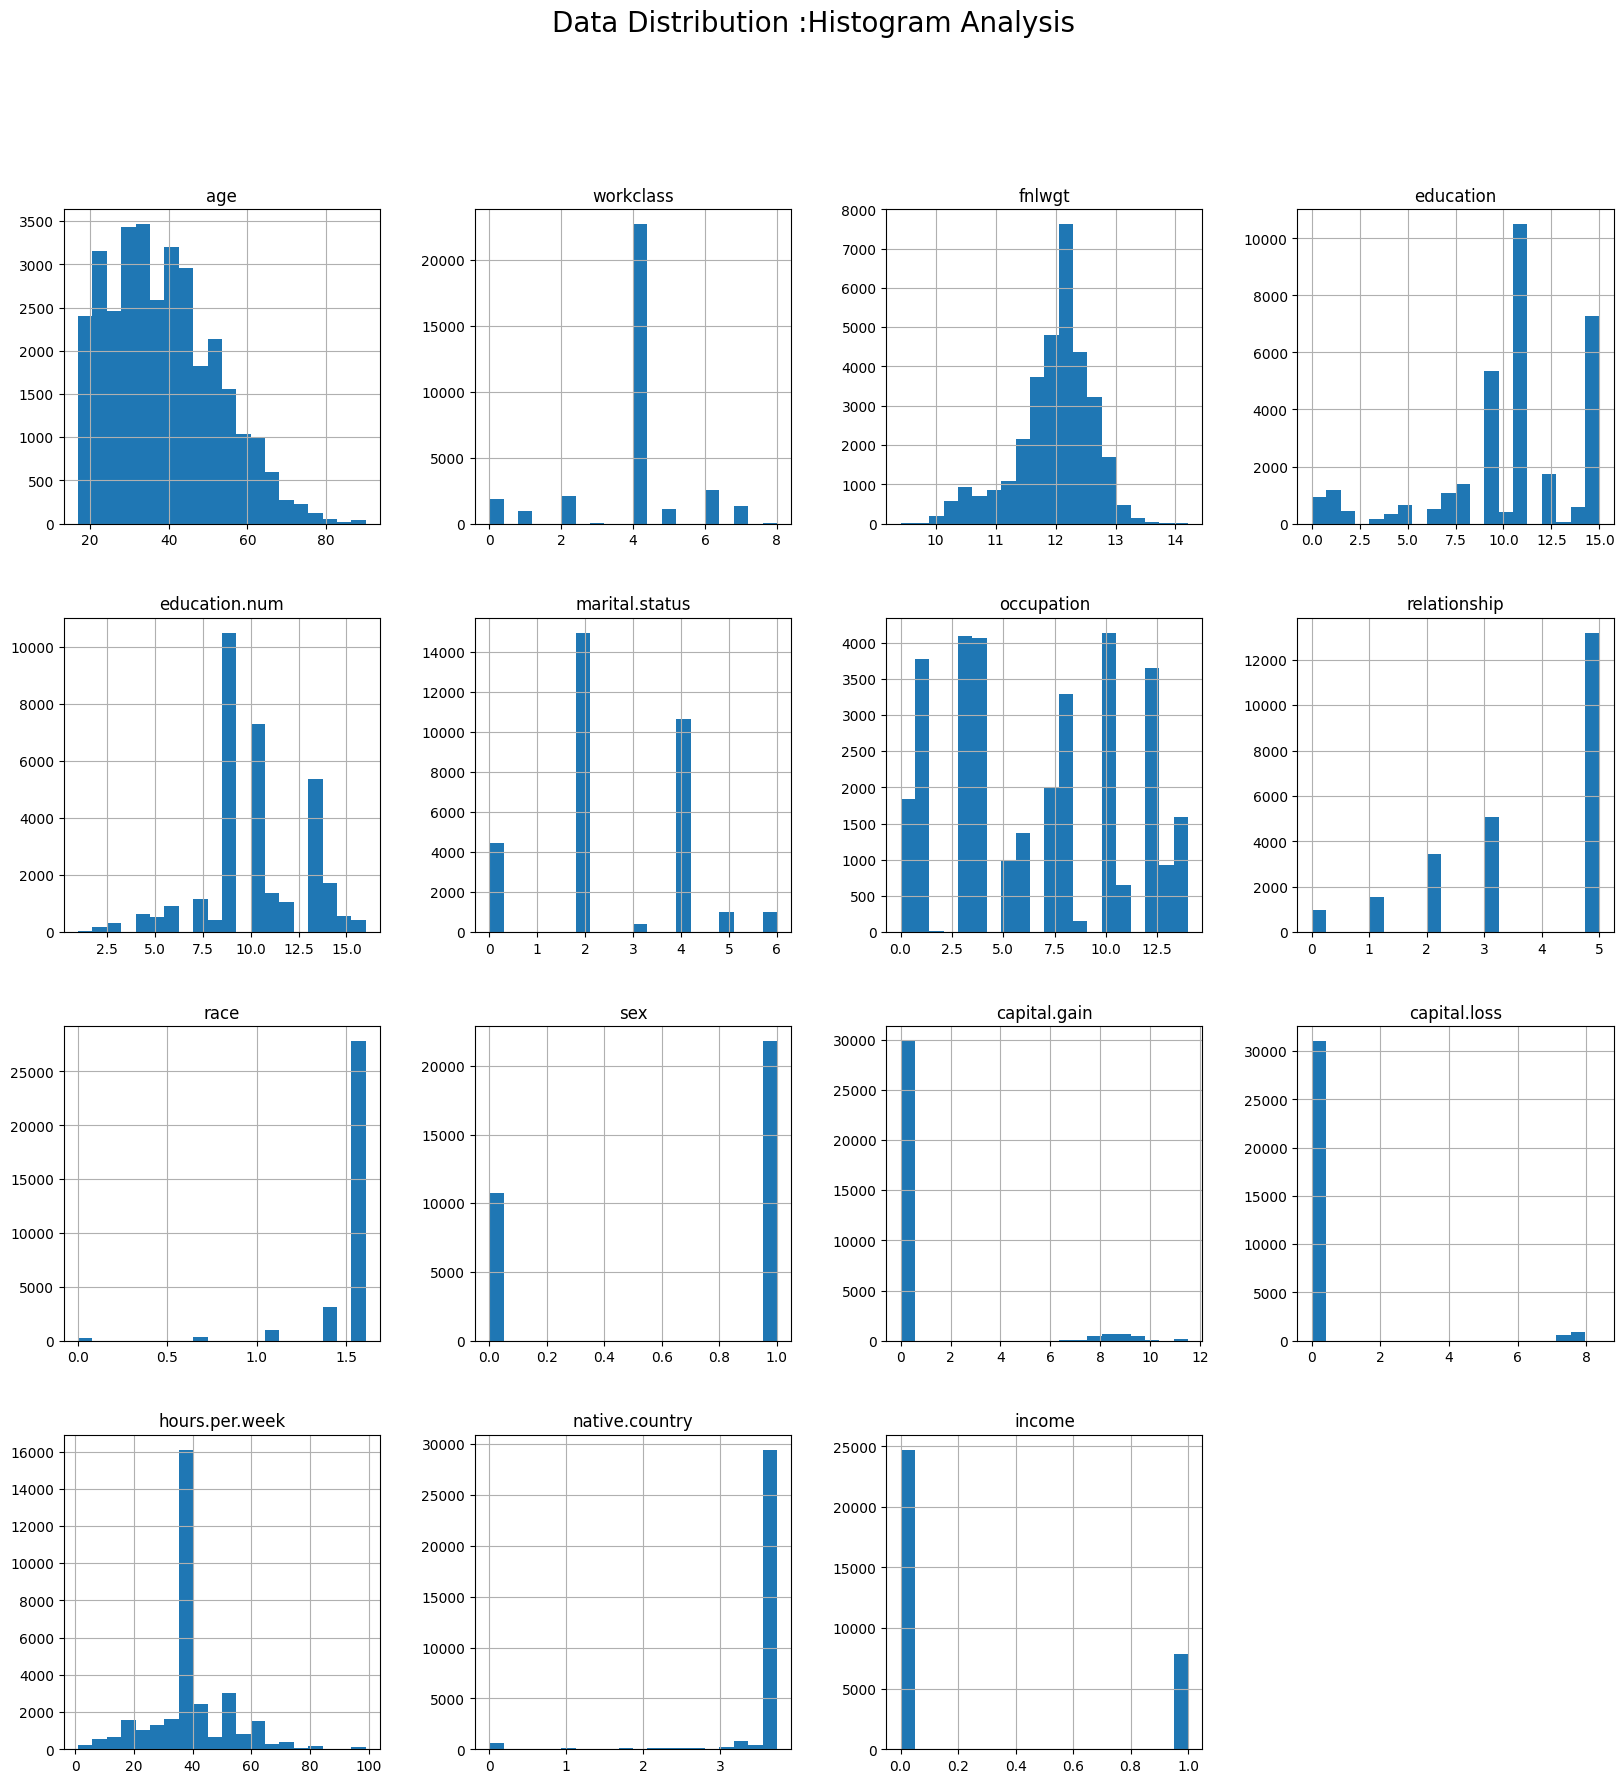

In [66]:
df.hist(bins=20, figsize=(20,20))
plt.suptitle("Data Distribution :Histogram Analysis",fontsize=20)
plt.show()

### REMOVING UNWANTED FEATURES 

<Axes: >

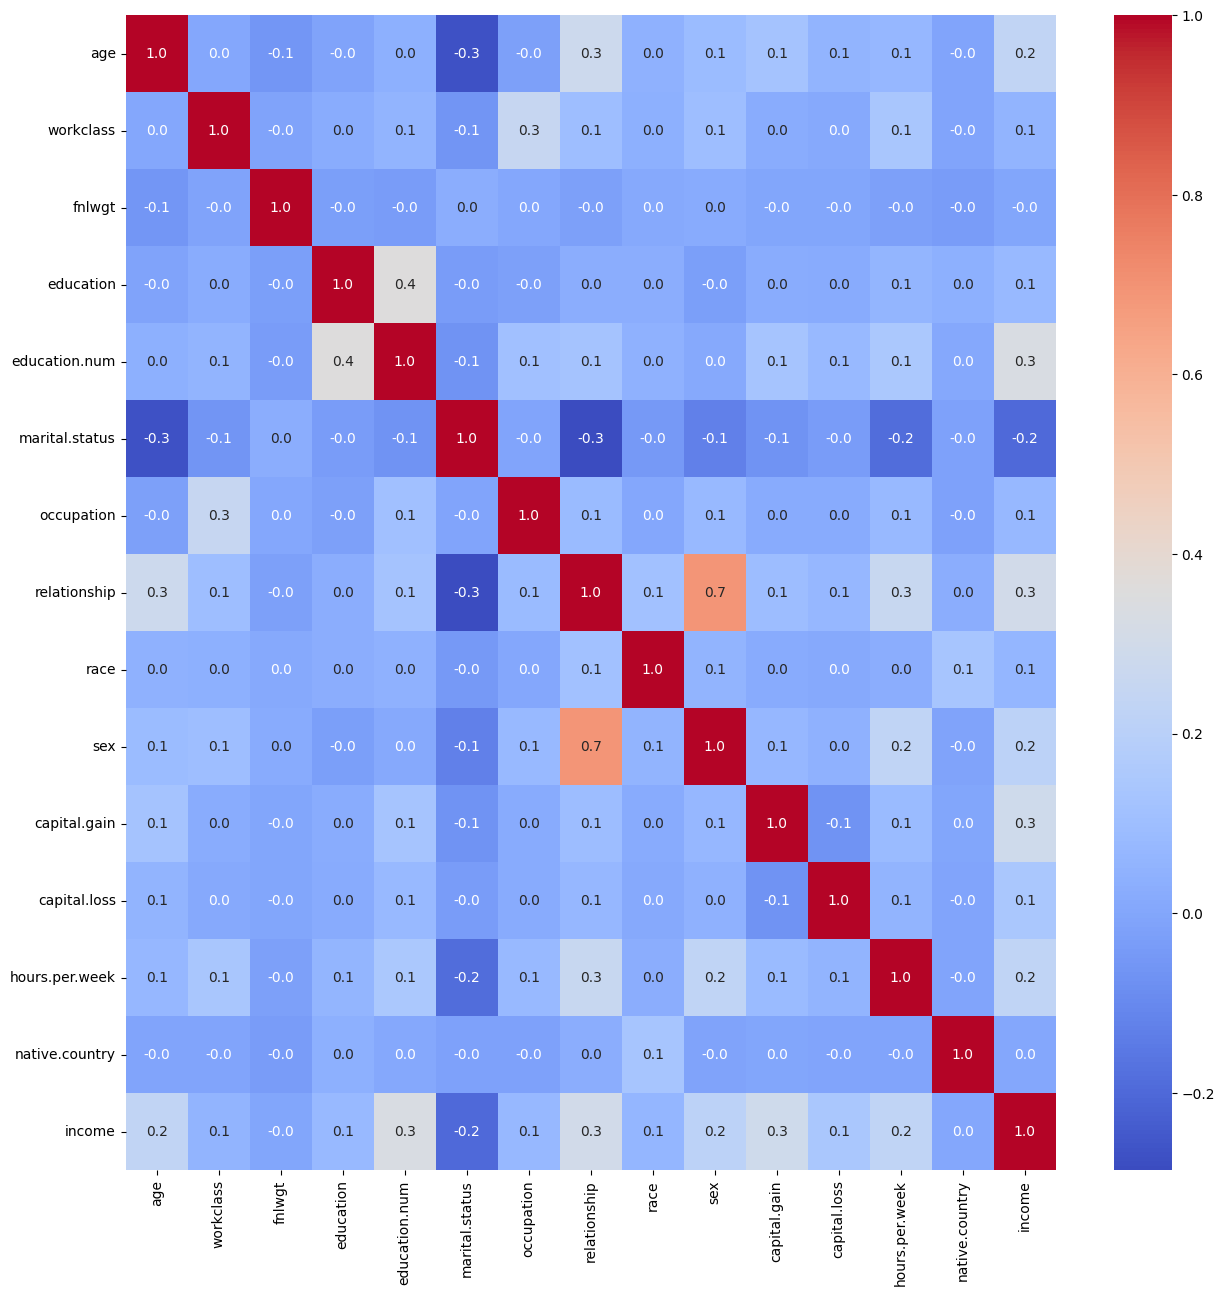

In [67]:
#BASED ON CORRELATION

plt.figure(figsize=(15,15))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm',fmt='0.01f')

In [68]:
corr_matrix=df.corr()

#set the correlation threshold
threshold=0.5

# Find pairs of features with high correlation 
highly_correlated_pairs=[]
for i in range (len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:   #check if the absolute correlation exceeds the threshold
            highly_correlated_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))


#Print all pairs of highly correlated features
print(highly_correlated_pairs)

[('sex', 'relationship')]


In [70]:
df.drop(["relationship"],axis=1,inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_21352\2688871265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["relationship"],axis=1,inplace=True)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  int64  
 1   workclass       32537 non-null  int64  
 2   fnlwgt          32537 non-null  float64
 3   education       32537 non-null  int64  
 4   education.num   32537 non-null  int64  
 5   marital.status  32537 non-null  int64  
 6   occupation      32537 non-null  int64  
 7   race            32537 non-null  float64
 8   sex             32537 non-null  int64  
 9   capital.gain    32537 non-null  float64
 10  capital.loss    32537 non-null  float64
 11  hours.per.week  32537 non-null  int64  
 12  native.country  32537 non-null  float64
 13  income          32537 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 3.7 MB


### SCALING

In [72]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
# create a copy of the original data for comparison
df_scaled=df.copy()

#select numeric coumns excluding 'income'
numeric_cols=df.drop(columns=['income']).select_dtypes(include=['number']).columns

#initialize the standerdscaler
scaler=StandardScaler()

#apply the scaler only to the numeric columns
df_scaled[numeric_cols]=scaler.fit_transform(df[numeric_cols])
df_scaled.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.770003,-2.656327,-1.159963,0.181519,-0.420679,2.249634,-1.554066,0.302712,-1.422436,-0.299391,5.065241,-0.035664,0.237858,0
1,3.183397,0.090129,-0.295999,0.181519,-0.420679,2.249634,-0.608318,0.302712,-1.422436,-0.299391,5.065241,-1.817516,0.237858,0
2,2.010185,-2.656327,0.237884,1.215089,-0.031815,2.249634,-1.554066,-0.825522,-1.422436,-0.299391,5.065241,-0.035664,0.237858,0
3,1.130276,0.090129,-0.209056,-1.368836,-2.364998,-1.733696,0.100993,0.302712,-1.422436,-0.299391,4.995497,-0.035664,0.237858,0
4,0.177041,0.090129,0.796629,1.215089,-0.031815,1.585746,0.810304,0.302712,-1.422436,-0.299391,4.995497,-0.035664,0.237858,0


### HANDLING OUTLIERS

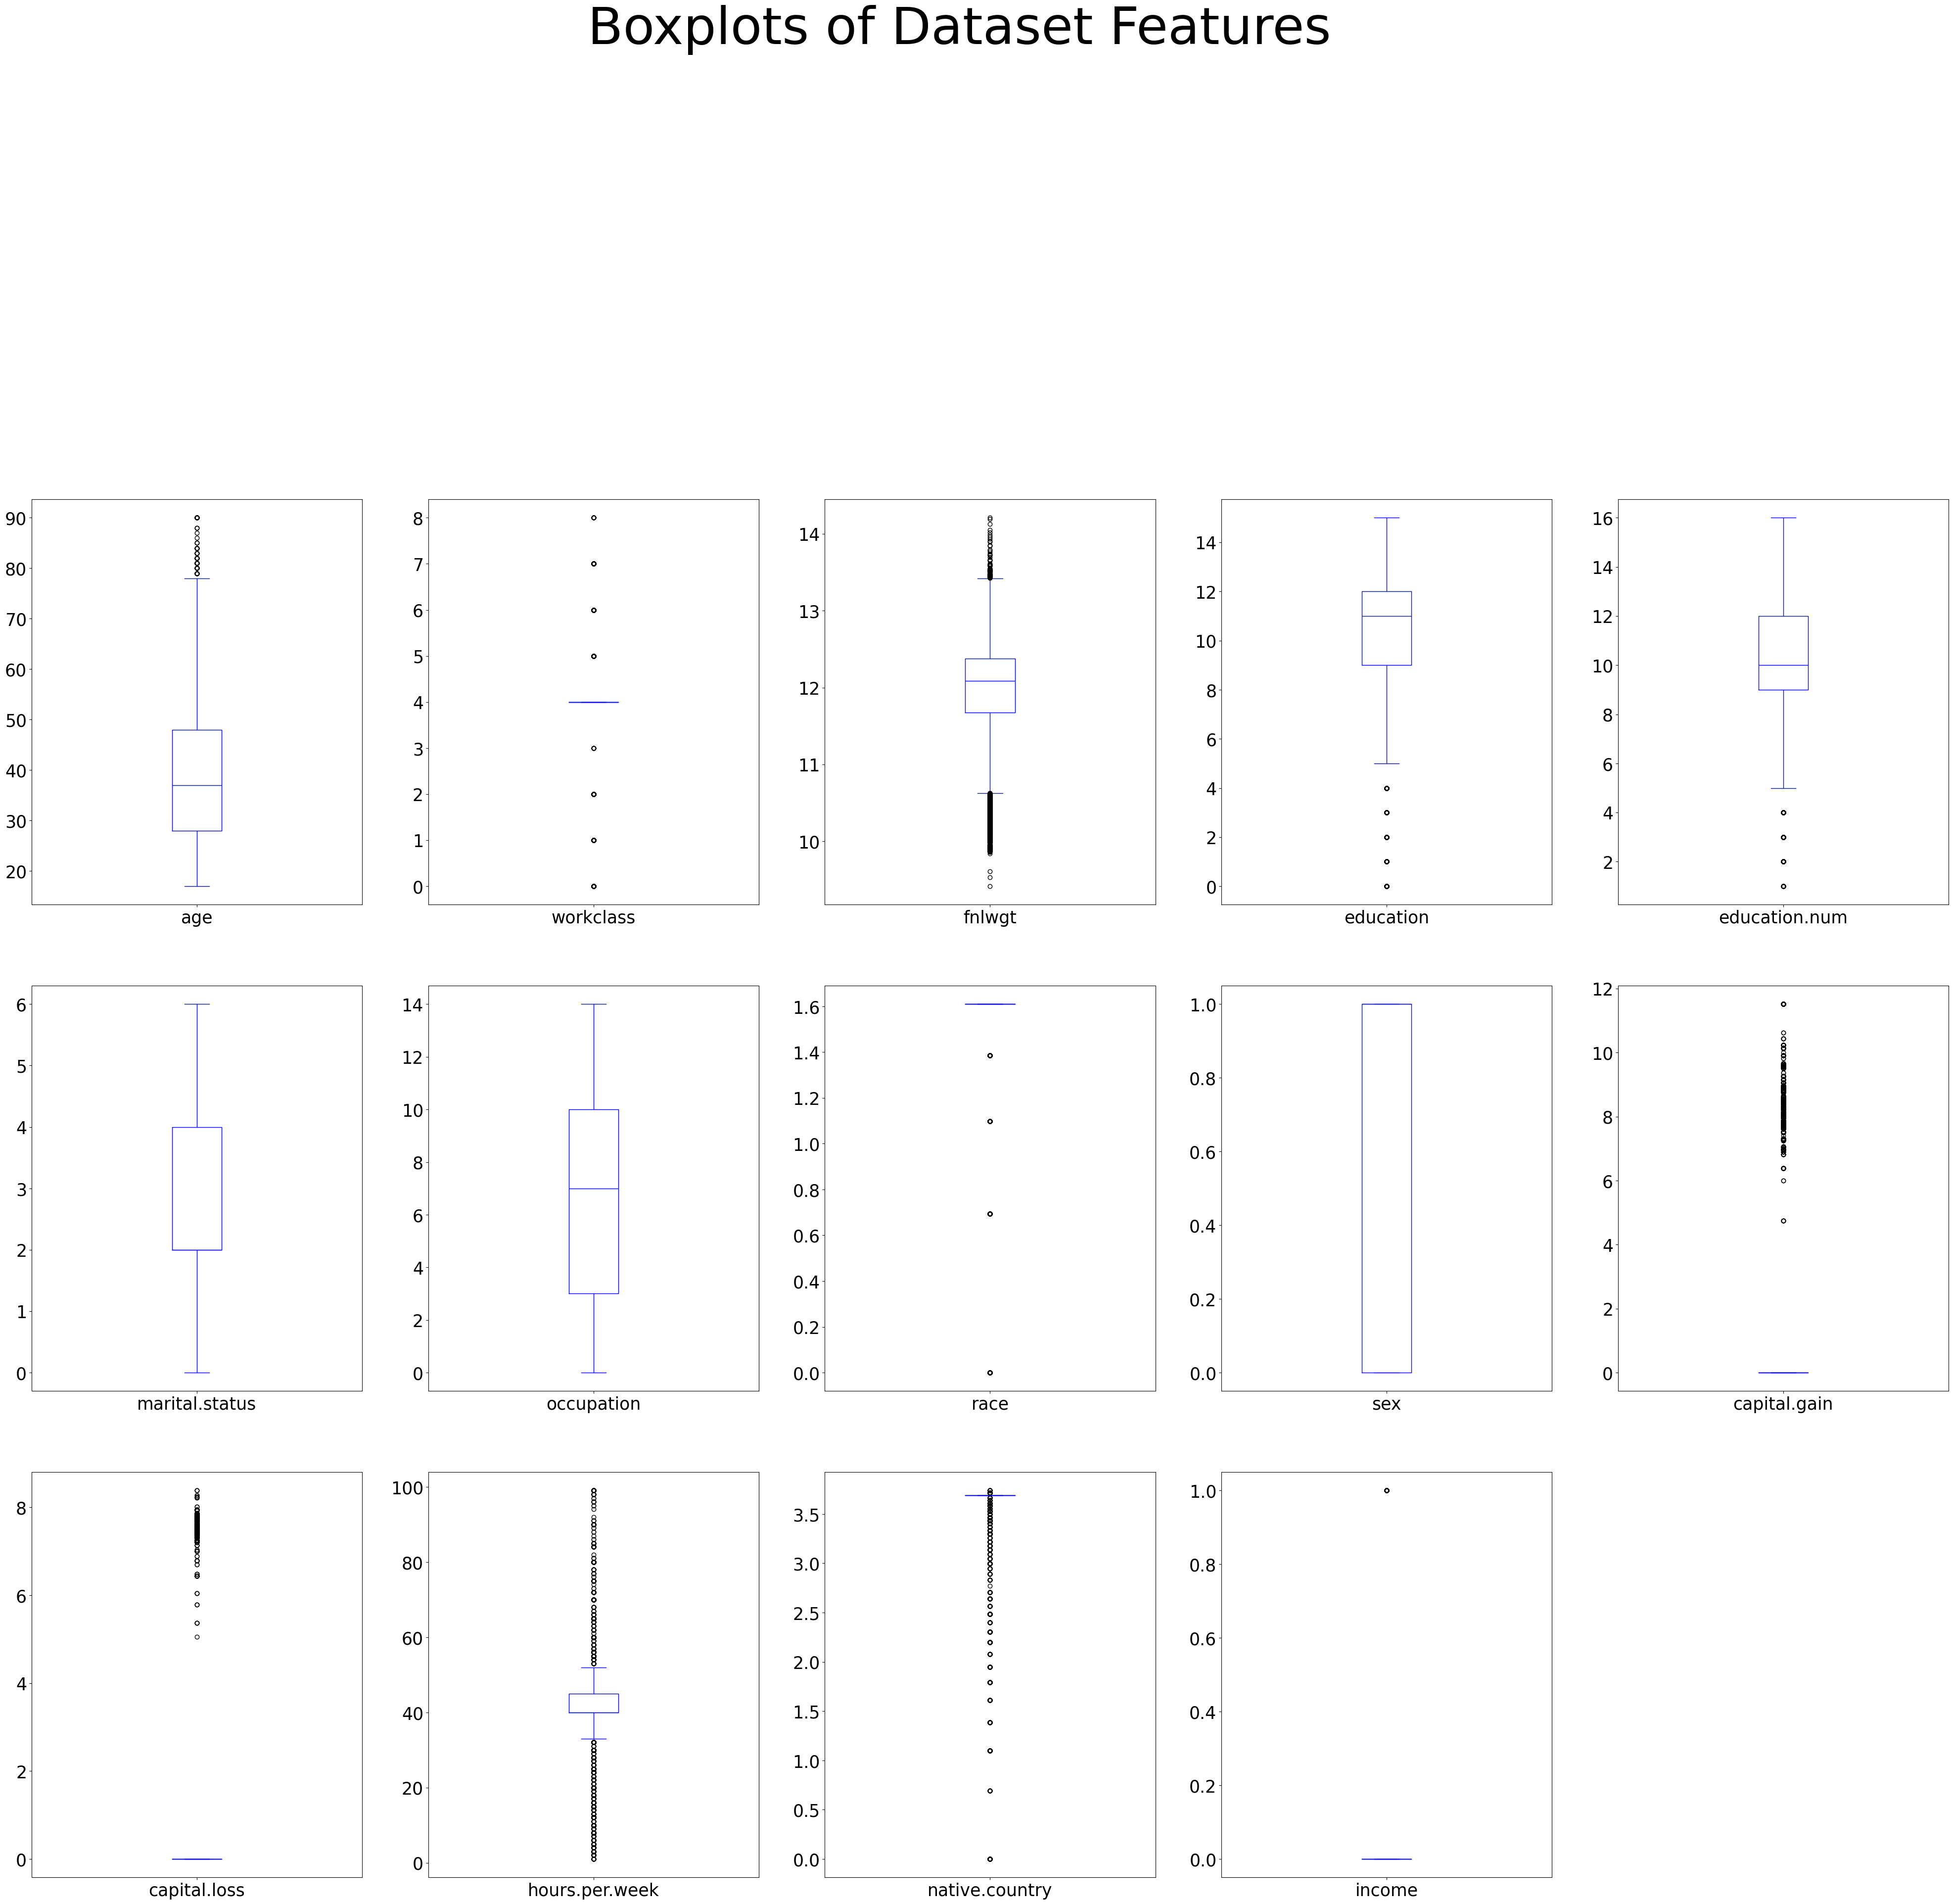

In [73]:
#USING BOXPLOT

df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='blue',fontsize=25)
plt.suptitle("Boxplots of Dataset Features",fontsize=75)
plt.show()

In [74]:
# create a copy the original data for comparison
df_copy=df.copy()

def remove_outliers_iqr(df,exclude_columns):
    #Loop thruogh numeric columns
    for column in df.select_dtypes(include=['number']):
        if column in exclude_columns:
            continue  #skip exclude columns

        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1

        #Define outlier bonds
        lower_bond=Q1-1.5*IQR
        upper_bond=Q3+1.5*IQR

        #Filter out the outliers
        df=df[(df[column]>=lower_bond)& (df[column]<=upper_bond)]
    return df

#Define the columns to exclude 
exclude_columns=['income']

#remove outliers
df=remove_outliers_iqr(df,exclude_columns)

#print shapes of data before and after removing outliers
print("shape of data before removing outliers :",df_copy.shape)
print("shape of data after removing outliers :",df.shape)
print("Number of outlier removed:",df_copy.shape[0]-df.shape[0])

shape of data before removing outliers : (32537, 14)
shape of data after removing outliers : (9849, 14)
Number of outlier removed: 22688


# CLASSIFICATION MODELING

In [75]:
x=df.drop(['income'],axis=1)
y=df[['income']]

In [76]:
df[['income']].value_counts()

income
0         7650
1         2199
Name: count, dtype: int64

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

print('shape of training feature:',x_train.shape)
print('shape of testing feature :', x_test.shape)
print('shape of training target:',y_train.shape)
print('shape of testing target:',y_test.shape)

shape of training feature: (7879, 13)
shape of testing feature : (1970, 13)
shape of training target: (7879, 1)
shape of testing target: (1970, 1)


In [78]:
model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#Accuracy
arcy=accuracy_score(y_test,y_pred)
print("Accuracy:",arcy)

#confusion matrics
print("\nconfusion matrics:\n",confusion_matrix(y_test,y_pred))

#Detailed classification report
print("\nClassification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8020304568527918

confusion matrics:
 [[1446   84]
 [ 306  134]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      1530
           1       0.61      0.30      0.41       440

    accuracy                           0.80      1970
   macro avg       0.72      0.62      0.64      1970
weighted avg       0.78      0.80      0.78      1970



c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
clas_models={'lr':LogisticRegression(max_iter=500),
             'rfc':RandomForestClassifier(),
             'dtc':DecisionTreeClassifier(),
             'knn':KNeighborsClassifier(n_neighbors=11),
             'svm':SVC(kernel='linear'),
             'gbc':GradientBoostingClassifier(random_state=0,learning_rate=0.45),
             'etc':ExtraTreesClassifier(),
             'nb':GaussianNB()}

In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Dictionary to store result
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}

#Evaluate each model 
for model_name ,model in clas_models.items():
    #train the model 
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)

    #calculate metrics
    accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)

    #store results in the dictionary 
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

#convert results to a Dataframe 
results_df=pd.DataFrame(results)

#Display the results in a table
results_df

c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWa

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.802030,0.614679,0.304545,0.407295
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.812690,0.601719,0.477273,0.532319
2,DecisionTreeClassifier(),0.768020,0.481799,0.511364,0.496141
3,KNeighborsClassifier(n_neighbors=11),0.795431,0.546366,0.495455,0.519666
4,SVC(kernel='linear'),0.776650,0.000000,0.000000,0.000000
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.821827,0.626062,0.502273,0.557377
6,"(ExtraTreeClassifier(random_state=1220857786),...",0.808122,0.584239,0.488636,0.532178
7,GaussianNB(),0.798477,0.550827,0.529545,0.539977


In [81]:
x2s=df_scaled.drop('income',axis=1)
y2s=df_scaled[['income']]

x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)

#Dictionary to store result
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}

#Evaluate each model 
for model_name ,model in clas_models.items():
    #train the model 
    model.fit(x2s_train,y2s_train)
    model_pred2s=model.predict(x2s_test)

    #calculate metrics
    accuracy2=accuracy_score(y2s_test,model_pred2s)
    precision2=precision_score(y2s_test,model_pred2s)
    recall2=recall_score(y2s_test,model_pred2s)
    f12=f1_score(y2s_test,model_pred2s)

    #store results in the dictionary 
    results['Model'].append(model)
    results['Accuracy'].append(accuracy2)
    results['Precision'].append(precision2)
    results['Recall'].append(recall2)
    results['F1-Score'].append(f12)

#convert results to a Dataframe 
results_df2=pd.DataFrame(results)

#sort by accuracy
results_df2=results_df2.sort_values(by='Accuracy',ascending=False)

#display 
results_df2

c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWa

,Model,Accuracy,Precision,Recall,F1-Score
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.872465,0.764977,0.655263,0.705882
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.856177,0.718563,0.631579,0.672269
6,"(ExtraTreeClassifier(random_state=157779627), ...",0.847572,0.692982,0.623684,0.656510
3,KNeighborsClassifier(n_neighbors=11),0.829902,0.643303,0.609868,0.626140
0,LogisticRegression(max_iter=500),0.816533,0.653195,0.457237,0.537926
2,DecisionTreeClassifier(),0.813460,0.594212,0.634868,0.613868
7,GaussianNB(),0.811924,0.614198,0.523684,0.565341
4,SVC(kernel='linear'),0.810848,0.683609,0.353947,0.466407


# FINAL REPORT

### File Saving

In [ ]:
import pickle 

#save the classification model
c_model=GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open ("adult_classification_model.pkl",'wb') as file:
    pickle.dump(c_model,file)